In [2]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import backend as K

Using TensorFlow backend.
/Users/suzukishinji/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
K.set_image_dim_ordering('th')

In [15]:
train_df = pd.read_csv('/Users/suzukishinji/kaggle/MINIST/train.csv')
valid_df = pd.read_csv('/Users/suzukishinji/kaggle/MINIST/test.csv')

In [16]:
x_train = train_df.drop(['label'], axis = 1).values.astype('float32')
Y_train = train_df['label'].values
x_valid = valid_df.values.astype('float32')

In [17]:
img_width, img_height = 28, 28

In [18]:
n_train = x_train.shape[0]
n_valid = x_valid.shape[0]

In [19]:
n_classes = 10

In [20]:
x_train = x_train.reshape(n_train, 1, img_width, img_height)
x_valid = x_valid.reshape(n_valid, 1, img_width, img_height)

In [21]:
x_train = x_train/255
x_valid = x_valid/255

In [22]:
y_train = to_categorical(Y_train)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

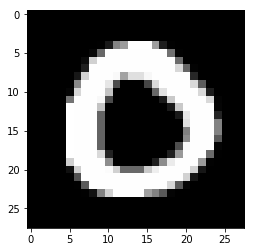

In [25]:
imgplot = plt.imshow(x_train[4, 0, :,:], cmap = 'gray')

In [27]:
from keras.models import Sequential
from keras.layers.convolutional import *
from keras.layers.core import Dropout, Dense, Flatten, Activation

In [29]:
n_filters = 64
filter_size1 = 3
filter_size2 = 2
pool_size1 = 3
pool_size2 = 1
n_dense = 128

model = Sequential()

model.add(Convolution2D(n_filters, filter_size1, filter_size1, batch_input_shape = (None, 1, img_width, img_height), activation = 'relu', border_mode = 'valid'))

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), batch_input_shape=(None, 1, ..., activation="relu", padding="valid")`
  # Remove the CWD from sys.path while we load stuff.


In [30]:
model.add(MaxPooling2D(pool_size = (pool_size1, pool_size1)))

In [31]:
model.add(Convolution2D(n_filters, filter_size2, filter_size2, activation='relu', border_mode = 'valid'))

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (2, 2), activation="relu", padding="valid")`
  """Entry point for launching an IPython kernel.


In [32]:
model.add(MaxPooling2D(pool_size=(pool_size2, pool_size2)))

In [33]:
model.add(Dropout(0.25))

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(n_dense))

In [36]:
model.add(Activation('relu'))

In [37]:
model.add(Dropout(0.5))

In [38]:
model.add(Dense(n_classes))

In [39]:
model.add(Activation('softmax'))

In [40]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [41]:
batch_size = 128
n_epochs = 1

model.fit(x_train, y_train, batch_size = batch_size, nb_epoch = n_epochs, verbose = 2, validation_split = 0.2)

/Users/suzukishinji/anaconda/lib/python3.6/site-packages/keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 33600 samples, validate on 8400 samples
Epoch 1/1
272s - loss: 0.4309 - acc: 0.8654 - val_loss: 0.0975 - val_acc: 0.9702
